In [30]:
# Install the here package if you haven't already
if (!requireNamespace("here", quietly = TRUE)) {
  install.packages("here")
}

library(here)
source(here("WL_helperfuncs.r"), encoding = "UTF-8")


psych <- read_csv(here("Final_Consolidated_Psychiatry_Data.csv"))

# Read and preprocess speech datasets
library(readxl)
library(dplyr)
library(readr)
library(tidyr)

# Read datasets
# Read and preprocess speech data
WL <- speech_read_and_preprocess(here("WINTERLIGHT_Sunnybrook_rTMS_2023_11_03.csv"))
WL_2 <- speech_read_and_preprocess(here("WINTERLIGHT_Sunnybrook_rTMSremote_2024_03_28.csv"))

# Apply filters
WL <- WL[grep("^(TMS|MDD)", WL$participant_external_id), ]
WL_2 <- WL_2[!(WL_2$participant_external_id == "TMS039" & WL_2$session_label %in% c("V2", "V3", "V4")), ]
WL_2 <- WL_2[!(WL_2$participant_external_id == "TMS039b" & WL_2$session_label == "V1"), ]
WL_2$participant_external_id[WL_2$session_label %in% c("V2", "V3") & WL_2$participant_external_id == "TMS039b"] <- "TMS039"


# Combine datasets
common_columns <- intersect(names(WL), names(WL_2))
WL_common <- WL[, common_columns]
WL_2_common <- WL_2[, common_columns]
WL_combined <- rbind(WL_common, WL_2_common)

# Processing participant_group
WL_combined$participant_group <- factor(
  ifelse(
    grepl("(^CTC|C_CTC)", WL_combined$participant_external_id), "Control",
    ifelse(grepl("^(TMS|MDD|MFB)", WL_combined$participant_external_id), "MDD", NA)
  )
)

# Filter to match participant IDs in WL data
psych_filtered <- psych %>%
  filter(participant_external_id %in% WL_combined$participant_external_id)



Rows: 73 Columns: 957
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (60): participant_external_id, demog_household_members, prtms_workstat_...
dbl (786): demog_gender, demog_sex, demog_age, demog_married, demog_children...
lgl (111): demog_gender_other, demog_sex_other, tms_details_ineligibility, t...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [35]:
# Selecting columns that start with 'curmed_name'
med_columns <- grep("^curmed_name", names(psych_filtered), value = TRUE)

# Gathering all medication columns into long format
df_long <- psych_filtered %>%
  select(med_columns) %>%
  pivot_longer(cols = everything(), names_to = "Medication", values_to = "Value") %>%
  filter(Value != "")  # Assuming empty strings represent no medication

# Cleaning and counting occurrences
df_long$Value <- tolower(df_long$Value)  # Convert to lower case
medication_counts <- df_long %>%
  group_by(Value) %>%
  summarise(Count = n(), .groups = 'drop') %>%
  arrange(desc(Count))

In [59]:

# Dictionary for renaming medications
groupings_corrected <- list(
  abilify = 'aripiprazole',
  'amlodipine besylate' = 'amlodipine',
  amlodipine. = 'amlodipine',
  amlopodine = 'amlodipine',
  candesartan = 'atacand',
  atorvastin = 'atorvastatin',
  bisoprolol = 'bisoprolol fumarate',
  vilantero = 'breo ellipta',
  'fluticasone furoate' = 'breo ellipta',
  brex = 'brexpiprazole',
  brozam = 'bromazepam',
  lectopam = 'bromazepam',
  lexomil = 'bromazepam',
  lexotan = 'bromazepam',
  lexilium = 'bromazepam',
  lexaurin = 'bromazepam',
  brazepam = 'bromazepam',
  rekotnil = 'bromazepam',
  bromaze = 'bromazepam',
  somalium = 'bromazepam',
  lexatin = 'bromazepam',
  calmepam = 'bromazepam',
  zepam = 'bromazepam',
  lexotanil = 'bromazepam',
  'bupropion xl' = 'bupropion',
  wellbutrin = 'bupropion',
  aplenzin = 'bupropion',
  budeprion = 'bupropion',
  buproban = 'bupropion',
  fortivo = 'bupropion',
  voxra = 'bupropion',
  zyban = 'bupropion',
  bupron = 'bupropion',
  bupisure = 'bupropion',
  bupep = 'bupropion',
  smoquite = 'bupropion',
  elontril = 'bupropion',
  buxon = 'bupropion',
  symbicort = 'budesonide/formoterol',
  tegratol = 'carbamazepine',
  tegretol = 'carbamazepine',
  reactine = 'cetirizine',
  'cetirizine (reactine)' = 'cetirizine',
  celexa = 'citalopram',
  omnaris = 'ciclesonide',
  cirpolex = 'escitalopram',
  ciprolex = 'escitalopram',
  cipralex = 'escitalopram',
  anafranil = 'clomipramine',
  clomicalm = 'clomipramine',
  clonazapam = 'clonazepam',
  clonaz = 'clonazepam',
  rivotril = 'clonazepam',
  klonopin = 'clonazepam',
  paxam = 'clonazepam',
  norpramin = 'desipramine',
  prolia = 'denosumab',
  'dexedrine spans' = 'dextroamphetamine',
  'dexedrine spansules' = 'dextroamphetamine',
  dexedrine = 'dextroamphetamine',
  cardura = 'doxazosin',
  'doxazosin mesylate' = 'doxazosin',
  cymbalta = 'duloxetine',
  dexilant = 'dexlansoprazole',
  vagifem = 'estradiol',
  proscar = 'finasteride',
  propecia = 'finasteride',
  pepcid = 'famotidine',
  prozac = 'fluoxetine',
  'gabapentin 300prn' = 'gabapentin',
  cortef = 'hydrocortisone',
  onbrez = 'indacaterol',
  tresiba = 'insulin degludec',
  'tresiba (insulin)' = 'insulin degludec',
  jnaumet = 'janumet',
  lamotragine = 'lamotrigine',
  elvanse = 'lisdexamfetamine',
  vyvanse = 'lisdexamfetamine',
  ldx = 'lisdexamfetamine',
  dayvigo = 'lemborexant',
  'lemborexant (dayvigo)' = 'lemborexant',
  fetzima = 'levomilnacipran',
  ativan = 'lorazepam',
  ltg = 'lamotrigine',
  synthroid = 'levothyroxine',
  'levothyroxine sodium' = 'levothyroxine',
  levothyroxine = 'levothyroxine',
  'l-thyroxine' = 'levothyroxine',
  mirtazpine = 'mirtazapine',
  mirtazapine = 'mirtazapine',
  mertazipine = 'mirtazapine',
  mirtazepine = 'mirtazapine',
  omeprazaole = 'omeprazole',
  pantopraz = 'pantoprazole',
  dicetel = 'pinaverium bromide',
  pregablin = 'pregabalin',
  seroquel = 'quetiapine',
  'quetiapine fumarate' = 'quetiapine',
  ritalin = 'methylphenidate',
  concerta = 'methylphenidate',
  'methylphenidate extended release (concerta)' = 'methylphenidate',
  salagen = 'pilocarpine',
  rosusatitin = 'rosuvastatin',
  crestor = 'rosuvastatin',
  ozempic = 'semaglutide',
  setraline = 'sertraline',
  spriva = 'tiotropium bromide',
  effexor = 'venlafaxine',
  'venlafaxine hcl xr' = 'venlafaxine',
  trintellix = 'vortioxetine',
  ventolin = 'albuterol',
  salbutamol = 'albuterol',
  viibryd = 'vilazodone',
  indayo = 'levonorgestrel-ethinyl estradiol',
  'ortho tri-cyclen' = 'norgestimate-ethinyl estradiol',
  'ortho tri-cyclen lo' = 'norgestimate-ethinyl estradiol',
  tricyclin = 'norgestimate-ethinyl estradiol',
  zopiclone = 'zopiclone',
  zoolicon = 'zopiclone',
  zopliclone = 'zopiclone'
)

# Ensure Value column is character before applying the transformation
medication_counts$Value <- as.character(medication_counts$Value)

# Applying the corrected renaming to the medication counts
medication_counts$Value <- sapply(medication_counts$Value, function(x) {
  if (is.null(groupings_corrected[[x]])) x else groupings_corrected[[x]]
})

# Re-counting and sorting the medications
medication_counts <- medication_counts %>%
  group_by(Value) %>%
  summarise(Count = sum(Count), .groups = 'drop') %>%
  arrange(desc(Count))

medication_counts

Value,Count
<chr>,<int>
bupropion,7
levothyroxine,7
quetiapine,7
vortioxetine,7
clonazepam,6
rosuvastatin,6
amlodipine,5
aripiprazole,5
mirtazapine,5


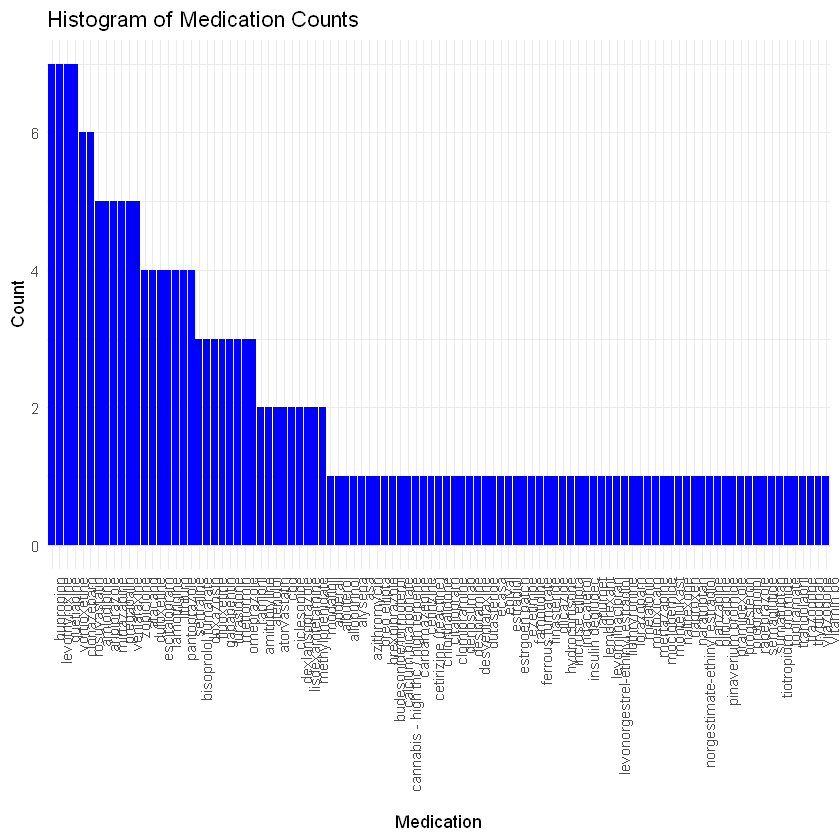

In [52]:
# Ensure that ggplot2 is loaded
library(ggplot2)

# Convert Value column to factor and reorder it based on Count
medication_counts$Value <- factor(medication_counts$Value, levels = medication_counts$Value[order(-medication_counts$Count)])

# Plotting histogram
p <- ggplot(medication_counts, aes(x=Value, y=Count)) +
  geom_bar(stat="identity", fill="blue") +
  theme_minimal() +
  ggtitle("Histogram of Medication Counts") + # Explicitly set the title
  labs(x="Medication", y="Count") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

# Print the plot object to ensure it renders correctly
print(p)

In [70]:
drug_classes <- list(
  SSRIs = c("escitalopram", "sertraline", "fluoxetine", "citalopram", "paroxetine", "fluvoxamine"),
  SNRIs = c("venlafaxine", "duloxetine", "desvenlafaxine", "levomilnacipran"),
  TCAs = c("amitriptyline", "clomipramine", "desipramine"),
  NDRIs = c("bupropion"),
  Tetracyclics = c("mirtazapine"),
  SMSs = c("vortioxetine", "vilazodone"),
  SARIs = c("trazodone"),
  MAOIs = c("moclobemide"),
  Antipsychotics = c("quetiapine", "aripiprazole", "brexpiprazole", "lurasidone", "olanzapine"),
  Benzodiazepines = c("clonazepam", "lorazepam"),
  Anticonvulsants_MoodStabilizers = c("lamotrigine", "carbamazepine", "topiramate", "valproate", "lithium"),
  Anticonvulsants = c("gabapentin", "pregabalin"),
  BetaBlockers = c("atenolol", "bisoprolol fumarate", "propranolol", "metoprolol", "carvedilol"),
  CalciumChannelBlockers = c("amlodipine", "diltiazem", "verapamil"),
  AlphaBlockers = c("doxazosin"),
  ACEInhibitors = c("lisinopril", "ramipril", "enalapril", "trandolapril"),
  Statins = c("rosuvastatin", "atorvastatin"),
  ThyroidMedications = c("levothyroxine", "liothyronine"),
  Antidiabetics = c("metformin", "insulin degludec", "gliclazide", "dulaglutide", "semaglutide"),
  ProtonPumpInhibitors = c("pantoprazole", "omeprazole", "dexlansoprazole", "rabeprazole"),
  RespiratoryMedications = c("incruse ellipta", "albuterol", "budesonide/formoterol", "tiotropium bromide", "indacaterol", "ciclesonide", "breo ellipta", "montelukast"),
  Antihistamines = c("cetirizine"),
  OralContraceptives = c("levonorgestrel-ethinyl estradiol", "norgestimate-ethinyl estradiol", "alysena"),
  Pain_AntiInflammatory = c("meloxicam", "naproxen", "sumatriptan", "naratriptan", "asa"),
  HRT = c("estradiol", "estrogen patch", "progesterone"),
  Gastrointestinal = c("famotidine", "pinaverium bromide", "calcium bicarbonate"),
  Vitamins_Supplements = c("vitamin b6", "melatonin", "ferrous fumarate", "tryptophan"),
  Cannabinoids = c("cannabis - high thc / high terpene", "cbd"),
  OpioidAntagonists = c("naltrexone"),
  DopamineAgonists = c("pramipexole"),
  Stimulants = c("methylphenidate", "lisdexamfetamine", "dextroamphetamine", "modafinil", "adderall"),
  XOI = c("allopurinol"), 
  Antibiotics = c("azithromycin"),
  Diuretics=c("chlorthalidone"),
  RANKLigandInhibitor = c("denosumab"),
  '5-alphaReductaseInhibitor'= c("dutasteride"),
  Corticosteroids =c("hydrocortisone"), 
  'Non-benzodiazepeneHypnotic'=c("zopiclone")
)

# Function to calculate the total counts for each drug class
calculate_class_counts <- function(drug_classes, medication_counts) {
  class_counts <- sapply(names(drug_classes), function(class) {
    drugs_in_class <- drug_classes[[class]]
    sum(medication_counts %>% filter(Value %in% drugs_in_class) %>% pull(Count))
  })
  
  return(data.frame(Class = names(class_counts), TotalCounts = class_counts))
}

# Calculate the total counts for each drug class
class_counts_df <- calculate_class_counts(drug_classes, medication_counts)

# Order by total counts in descending order
class_counts_df <- class_counts_df %>% arrange(desc(TotalCounts))

# Print the results
print(class_counts_df)


                                                          Class TotalCounts
Antipsychotics                                   Antipsychotics          17
SSRIs                                                     SSRIs          12
SNRIs                                                     SNRIs          11
Anticonvulsants_MoodStabilizers Anticonvulsants_MoodStabilizers          10
ProtonPumpInhibitors                       ProtonPumpInhibitors          10
RespiratoryMedications                   RespiratoryMedications           9
SMSs                                                       SMSs           8
Anticonvulsants                                 Anticonvulsants           8
Statins                                                 Statins           8
NDRIs                                                     NDRIs           7
ThyroidMedications                           ThyroidMedications           7
Stimulants                                           Stimulants           7
Benzodiazepi

In [64]:
# Function to check for multiple drugs in the same class
check_multiple_drugs_in_class <- function(drug_classes, psych_filtered) {
  results <- data.frame(participant_external_id = character(), Class = character(), NumDrugs = numeric(), stringsAsFactors = FALSE)

  # Gather all medication columns into long format
  med_columns <- grep("^curmed_name", names(psych_filtered), value = TRUE)
  psych_long <- psych_filtered %>%
    pivot_longer(cols = all_of(med_columns), names_to = "MedicationColumn", values_to = "Medication") %>%
    filter(!is.na(Medication) & Medication != "")

  for (class in names(drug_classes)) {
    drugs_in_class <- drug_classes[[class]]
    participant_counts <- psych_long %>%
      filter(Medication %in% drugs_in_class) %>%
      group_by(participant_external_id) %>%
      summarise(NumDrugs = n_distinct(Medication)) %>%
      filter(NumDrugs > 1)
    
    if (nrow(participant_counts) > 0) {
      participant_counts <- participant_counts %>% mutate(Class = class)
      results <- rbind(results, participant_counts)
    }
  }
  
  return(results)
}

# Check for multiple drugs in the same class
multiple_drugs_in_class <- check_multiple_drugs_in_class(drug_classes, psych_filtered)

# Print the results
print(multiple_drugs_in_class)

# Function to count the number of drugs each participant is on
count_participant_drugs <- function(psych_filtered) {
  # Gather all medication columns into long format
  med_columns <- grep("^curmed_name", names(psych_filtered), value = TRUE)
  psych_long <- psych_filtered %>%
    pivot_longer(cols = all_of(med_columns), names_to = "MedicationColumn", values_to = "Medication") %>%
    filter(!is.na(Medication) & Medication != "")
  
  # Count the number of distinct medications for each participant
  participant_drug_counts <- psych_long %>%
    group_by(participant_external_id) %>%
    summarise(NumDrugs = n_distinct(Medication)) %>%
    arrange(desc(NumDrugs))
  
  return(participant_drug_counts)
}

# Count the number of drugs each participant is on
participant_drug_counts <- count_participant_drugs(psych_filtered)

# Print the results
print(participant_drug_counts)

[1] participant_external_id Class                   NumDrugs               
<0 rows> (or 0-length row.names)
# A tibble: 47 × 2
   participant_external_id NumDrugs
   <chr>                      <int>
 1 TMS031                        10
 2 TMS042                        10
 3 TMS056                        10
 4 TMS058                         9
 5 TMS016                         8
 6 TMS044                         8
 7 TMS059                         7
 8 TMS004                         6
 9 TMS019                         6
10 TMS028                         6
# ℹ 37 more rows
